# Nearest Neighbors Classification

Nearest Neighbors 방법은 내부적으로 모델을 생성하지 않고 훈련 데이터를 저장하고 그 유사도를 측정하여 문제를 해결하는 방법입니다. 데이터의 독립변수가 거리기반으로 종속변수와 관계가 있는 데이터일 경우 사용할 수 있습니다. 

Nearest Neighbors 는 Neighbor를 선정하는 방식에 따라 K Nearest Neighbors, Radius Neighbors으로 나뉘어 집니다.

* K Nearest Neighbors: 사용자가 정의한 K 파라미터 수 만큼의 Nearest Neighbors 데이터를 이용합니다.
* Radius Neighbors: 사용가자 정의한 R 파라미터 만큼의 반경안에 존재하는 Neighbors 데이터를 이용합니다.

데이터의 분포가 Sparse 할 경우 KNN 방식은 최근접 K 개의 후보를 선정하는 것에 문제가 있기 때문에 Radius Neighbors 방식을 이용하는 것이 좋습니다.

기본적으로 Neighbors 의 경우 결과 값을 계산할 경우 후보 Neighbors 데이터 결과 값의 uniform 한 가중치를 적용하여 결과 값을 계산합니다. 데이터의 거리 기반으로 결과 값 계산에 다른 가중치를 주고 싶다면, weights 파라미터의 값을 'distance' 로 변경할 수 있습니다.

**Weight**
기본적으로 Neighbors 의 경우 결과 값을 계산할 경우 후보 Neighbors 데이터 결과 값의 uniform 한 가중치를 적용하여 결과 값을 계산합니다. 데이터의 거리 기반으로 결과 값 계산에 다른 가중치를 주고 싶다면, weights 파라미터의 값을 'distance' 로 변경할 수 있습니다.

**Algorithm**
Neighbor를 찾기 위해 거리를 계산하는 방식을 선택 할수 있습니다. 'brute', 'kd_tree', 'ball_tree'  세가지 방법을 제공합니다. 계산 속도는 데이터 수와 차원에 의해서 결정되기 때문에 기본 값인 'auto' 로 설정되어 있으면, 이 조건에 따라 알맞은 계산 알고리즘이 선택됩니다.

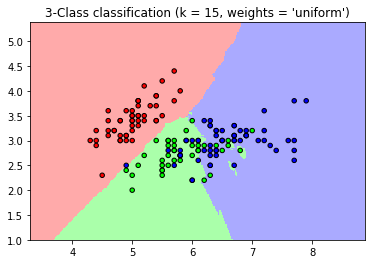

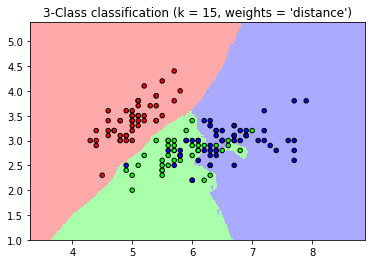

In [1]:
# 참조: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from sklearn import datasets, model_selection, neighbors, metrics

# 데이터
np.random.seed(0)
n_samples = 10000
np_data_xs, np_data_ys = datasets.make_classification(
    n_samples=n_samples, # 데이터 수
    n_features=10, # X feature 수
    n_informative=3,
    n_classes=3, # Y class 수
    random_state=0) # 난수 발생용 Seed 값
print("data shape: np_data_xs={}, np_data_ys={}".format(np_data_xs.shape, np_data_ys.shape))
np_train_xs, np_test_xs, np_train_ys, np_test_ys = model_selection.train_test_split(
    np_data_xs, np_data_ys, 
    test_size=0.3, shuffle=True, random_state=2)
print("train shape: np_train_xs={}, np_train_ys={}".format(np_train_xs.shape, np_train_ys.shape))
print("test shape: np_test_xs={}, np_test_ys={}".format(np_test_xs.shape, np_test_ys.shape))

# 모델
models = [
    neighbors.KNeighborsClassifier(5),
    neighbors.KNeighborsClassifier(5, weights='distance'),    
    neighbors.RadiusNeighborsClassifier(3.9),
    neighbors.RadiusNeighborsClassifier(3.9, weights='distance')
]

for model in models:
    # 학습
    print("\nmodel={}".format(model))
    model.fit(np_train_xs, np_train_ys)

    # 평가
    np_pred_ys = model.predict(np_test_xs)

    acc = metrics.accuracy_score(np_test_ys, np_pred_ys)
    print("acc={:.5f}".format(acc))

    cr = metrics.classification_report(np_test_ys, np_pred_ys)
    print("classification_report\n", cr)

data shape: np_data_xs=(10000, 10), np_data_ys=(10000,)
train shape: np_train_xs=(7000, 10), np_train_ys=(7000,)
test shape: np_test_xs=(3000, 10), np_test_ys=(3000,)

model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
acc=0.91600
classification_report
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      1021
           1       0.93      0.90      0.91      1011
           2       0.91      0.97      0.94       968

   micro avg       0.92      0.92      0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000


model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')
acc=0.91533
classification_report
               precision    recall